# Keras - Simple (Bessaker)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_bessaker_simple.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 14 columns):
BESS-Bessakerfj.-GS-T4015A3 -0104    5237 non-null float64
DNMI_69100...........T0015A3-0120    5237 non-null float64
/arome_windvel_6347_1092             5190 non-null float64
DNMI_71550...........T0015A3-0120    5237 non-null float64
/arome_windvel_6372_0961             5190 non-null float64
DNMI_71850...........T0015A3-0120    5237 non-null float64
/arome_windvel_6413_0933             5190 non-null float64
DNMI_71990...........T0015A3-0120    5237 non-null float64
/arome_windvel_6440_1047             5190 non-null float64
DNMI_72580...........T0015A3-0120    5237 non-null float64
/arome_windvel_6447_1156             5190 non-null float64
STORM-Bess-Vindretn-25km             5237 non-null int64
STORM-Bess-Vindhast-25km             5237 non-null float64
Target                               5237 non-null float64
dtypes: float64(13), int64(1)
memory usage: 572.9 KB


In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 5236
Data columns (total 14 columns):
BESS-Bessakerfj.-GS-T4015A3 -0104    5190 non-null float64
DNMI_69100...........T0015A3-0120    5190 non-null float64
/arome_windvel_6347_1092             5190 non-null float64
DNMI_71550...........T0015A3-0120    5190 non-null float64
/arome_windvel_6372_0961             5190 non-null float64
DNMI_71850...........T0015A3-0120    5190 non-null float64
/arome_windvel_6413_0933             5190 non-null float64
DNMI_71990...........T0015A3-0120    5190 non-null float64
/arome_windvel_6440_1047             5190 non-null float64
DNMI_72580...........T0015A3-0120    5190 non-null float64
/arome_windvel_6447_1156             5190 non-null float64
STORM-Bess-Vindretn-25km             5190 non-null int64
STORM-Bess-Vindhast-25km             5190 non-null float64
Target                               5190 non-null float64
dtypes: float64(13), int64(1)
memory usage: 608.2 KB


In [4]:
num_features = len(data.columns) -1
print(num_features)

13


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

In [6]:
# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

In [7]:
# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

In [8]:
from sklearn import metrics
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y, x[:,0]))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y, x[:,0]))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y, x[:,0])))

Mean Absolute Error: 			 4.63627
Mean Squared Error: 			 56.1308
Root Mean Squared Error: 		 7.49205


#### Train/test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

#### Skalere data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Lage en scaler
scaler = MinMaxScaler()

In [13]:
# Anvende på features, her lagret i variablen x.
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# Keras

In [14]:
import tensorflow as tf

#### Importere modellen

In [15]:
from tensorflow.contrib.keras import models

In [16]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [17]:
from tensorflow.contrib.keras import layers

In [18]:
# Input layer
dnn_keras_model.add(layers.Dense(units=64, input_dim= num_features, activation='relu'))

In [19]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [20]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [21]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [22]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [23]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [24]:
from tensorflow.contrib.keras import callbacks

In [25]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_bessaker_simple.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [26]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3633 samples, validate on 1557 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 4.86466, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 7.3580 - val_loss: 4.8647
Epoch 2/10000
Epoch 00001: val_loss improved from 4.86466 to 4.49132, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 4.8581 - val_loss: 4.4913
Epoch 3/10000
Epoch 00002: val_loss improved from 4.49132 to 4.46808, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 4.5667 - val_loss: 4.4681
Epoch 4/10000
Epoch 00003: val_loss improved from 4.46808 to 4.39003, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 4.5677 - val_loss: 4.3900
Epoch 5/10000
Epoch 00004: val_loss did not improve
0s - loss: 4.4911 - val_loss: 4.4059
Epoch 6/10000
Epoch 00005: val_loss did not improve
0s - loss: 4.4716 - val_loss: 4.7778
Epoch 7/10000
Epoch 00006: val_loss did not improve
0s - loss: 4.5704 - val_loss: 4.4512
Epoch 8/10000
Epoch 00007: val_loss did not improve
0

Epoch 00077: val_loss did not improve
0s - loss: 4.1894 - val_loss: 4.2552
Epoch 79/10000
Epoch 00078: val_loss did not improve
0s - loss: 4.2186 - val_loss: 4.4508
Epoch 80/10000
Epoch 00079: val_loss did not improve
0s - loss: 4.3043 - val_loss: 4.2195
Epoch 81/10000
Epoch 00080: val_loss did not improve
0s - loss: 4.2659 - val_loss: 4.3898
Epoch 82/10000
Epoch 00081: val_loss did not improve
0s - loss: 4.2046 - val_loss: 4.1832
Epoch 83/10000
Epoch 00082: val_loss did not improve
0s - loss: 4.1937 - val_loss: 4.3462
Epoch 84/10000
Epoch 00083: val_loss did not improve
0s - loss: 4.1966 - val_loss: 4.1363
Epoch 85/10000
Epoch 00084: val_loss did not improve
0s - loss: 4.1938 - val_loss: 4.1533
Epoch 86/10000
Epoch 00085: val_loss improved from 4.11880 to 4.11461, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 4.2685 - val_loss: 4.1146
Epoch 87/10000
Epoch 00086: val_loss did not improve
0s - loss: 4.1912 - val_loss: 4.2056
Epoch 88/10000
Epoch 00087: val_loss did not 

Epoch 00162: val_loss did not improve
0s - loss: 4.0822 - val_loss: 4.0791
Epoch 164/10000
Epoch 00163: val_loss did not improve
0s - loss: 4.0896 - val_loss: 4.1625
Epoch 165/10000
Epoch 00164: val_loss did not improve
0s - loss: 4.0918 - val_loss: 4.0890
Epoch 166/10000
Epoch 00165: val_loss did not improve
0s - loss: 4.1239 - val_loss: 4.1093
Epoch 167/10000
Epoch 00166: val_loss did not improve
0s - loss: 4.0846 - val_loss: 4.1073
Epoch 168/10000
Epoch 00167: val_loss did not improve
0s - loss: 4.0976 - val_loss: 4.2335
Epoch 169/10000
Epoch 00168: val_loss did not improve
0s - loss: 4.0689 - val_loss: 4.2273
Epoch 170/10000
Epoch 00169: val_loss did not improve
0s - loss: 4.1406 - val_loss: 4.0644
Epoch 171/10000
Epoch 00170: val_loss did not improve
0s - loss: 4.0953 - val_loss: 4.1252
Epoch 172/10000
Epoch 00171: val_loss did not improve
0s - loss: 4.1785 - val_loss: 4.0933
Epoch 173/10000
Epoch 00172: val_loss did not improve
0s - loss: 4.0921 - val_loss: 4.0735
Epoch 174/10000

Epoch 00249: val_loss did not improve
0s - loss: 3.9398 - val_loss: 3.9925
Epoch 251/10000
Epoch 00250: val_loss did not improve
0s - loss: 3.9508 - val_loss: 4.0021
Epoch 252/10000
Epoch 00251: val_loss did not improve
0s - loss: 3.9674 - val_loss: 4.1014
Epoch 253/10000
Epoch 00252: val_loss did not improve
0s - loss: 4.0245 - val_loss: 4.0018
Epoch 254/10000
Epoch 00253: val_loss did not improve
0s - loss: 3.9278 - val_loss: 4.1612
Epoch 255/10000
Epoch 00254: val_loss did not improve
0s - loss: 3.9493 - val_loss: 3.9696
Epoch 256/10000
Epoch 00255: val_loss did not improve
0s - loss: 3.9245 - val_loss: 4.0812
Epoch 257/10000
Epoch 00256: val_loss did not improve
0s - loss: 4.0047 - val_loss: 4.0337
Epoch 258/10000
Epoch 00257: val_loss did not improve
0s - loss: 4.0044 - val_loss: 4.0496
Epoch 259/10000
Epoch 00258: val_loss did not improve
0s - loss: 4.0138 - val_loss: 4.0623
Epoch 260/10000
Epoch 00259: val_loss did not improve
0s - loss: 4.0104 - val_loss: 4.0449
Epoch 261/10000

Epoch 00339: val_loss did not improve
0s - loss: 3.8817 - val_loss: 4.0545
Epoch 341/10000
Epoch 00340: val_loss did not improve
0s - loss: 3.9009 - val_loss: 4.0546
Epoch 342/10000
Epoch 00341: val_loss improved from 3.94578 to 3.93891, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 3.8640 - val_loss: 3.9389
Epoch 343/10000
Epoch 00342: val_loss did not improve
0s - loss: 3.8801 - val_loss: 3.9624
Epoch 344/10000
Epoch 00343: val_loss did not improve
0s - loss: 3.8644 - val_loss: 4.0318
Epoch 345/10000
Epoch 00344: val_loss did not improve
0s - loss: 3.8379 - val_loss: 3.9935
Epoch 346/10000
Epoch 00345: val_loss did not improve
0s - loss: 3.8445 - val_loss: 3.9841
Epoch 347/10000
Epoch 00346: val_loss did not improve
0s - loss: 3.8558 - val_loss: 4.0491
Epoch 348/10000
Epoch 00347: val_loss did not improve
0s - loss: 3.8820 - val_loss: 3.9426
Epoch 349/10000
Epoch 00348: val_loss did not improve
0s - loss: 3.8755 - val_loss: 4.0593
Epoch 350/10000
Epoch 00349: val_los

Epoch 00426: val_loss did not improve
0s - loss: 3.7353 - val_loss: 3.9615
Epoch 428/10000
Epoch 00427: val_loss did not improve
0s - loss: 3.7715 - val_loss: 3.9609
Epoch 429/10000
Epoch 00428: val_loss did not improve
0s - loss: 3.7184 - val_loss: 3.9714
Epoch 430/10000
Epoch 00429: val_loss did not improve
0s - loss: 3.7626 - val_loss: 3.9610
Epoch 431/10000
Epoch 00430: val_loss did not improve
0s - loss: 3.7810 - val_loss: 3.9969
Epoch 432/10000
Epoch 00431: val_loss did not improve
0s - loss: 3.8163 - val_loss: 3.9300
Epoch 433/10000
Epoch 00432: val_loss did not improve
0s - loss: 3.7846 - val_loss: 4.0070
Epoch 434/10000
Epoch 00433: val_loss did not improve
0s - loss: 3.7337 - val_loss: 4.1174
Epoch 435/10000
Epoch 00434: val_loss did not improve
0s - loss: 3.7588 - val_loss: 3.9772
Epoch 436/10000
Epoch 00435: val_loss did not improve
0s - loss: 3.7112 - val_loss: 3.9459
Epoch 437/10000
Epoch 00436: val_loss did not improve
0s - loss: 3.7803 - val_loss: 3.9492
Epoch 438/10000

Epoch 00516: val_loss did not improve
0s - loss: 3.7548 - val_loss: 4.2680
Epoch 518/10000
Epoch 00517: val_loss did not improve
0s - loss: 3.7004 - val_loss: 3.9342
Epoch 519/10000
Epoch 00518: val_loss did not improve
0s - loss: 3.6180 - val_loss: 3.9247
Epoch 520/10000
Epoch 00519: val_loss did not improve
0s - loss: 3.6923 - val_loss: 3.9648
Epoch 521/10000
Epoch 00520: val_loss did not improve
0s - loss: 3.6405 - val_loss: 3.8995
Epoch 522/10000
Epoch 00521: val_loss did not improve
0s - loss: 3.6696 - val_loss: 3.9290
Epoch 523/10000
Epoch 00522: val_loss did not improve
0s - loss: 3.7270 - val_loss: 3.9570
Epoch 524/10000
Epoch 00523: val_loss did not improve
0s - loss: 3.6904 - val_loss: 4.0093
Epoch 525/10000
Epoch 00524: val_loss did not improve
0s - loss: 3.6265 - val_loss: 4.1043
Epoch 526/10000
Epoch 00525: val_loss did not improve
0s - loss: 3.6738 - val_loss: 3.9489
Epoch 527/10000
Epoch 00526: val_loss did not improve
0s - loss: 3.6455 - val_loss: 4.0233
Epoch 528/10000

Epoch 00606: val_loss did not improve
0s - loss: 3.5357 - val_loss: 3.9171
Epoch 608/10000
Epoch 00607: val_loss did not improve
0s - loss: 3.6237 - val_loss: 3.9949
Epoch 609/10000
Epoch 00608: val_loss did not improve
0s - loss: 3.6311 - val_loss: 3.9331
Epoch 610/10000
Epoch 00609: val_loss did not improve
0s - loss: 3.5122 - val_loss: 3.9643
Epoch 611/10000
Epoch 00610: val_loss did not improve
0s - loss: 3.5337 - val_loss: 3.9295
Epoch 612/10000
Epoch 00611: val_loss did not improve
0s - loss: 3.5881 - val_loss: 4.0428
Epoch 613/10000
Epoch 00612: val_loss did not improve
0s - loss: 3.6257 - val_loss: 3.9401
Epoch 614/10000
Epoch 00613: val_loss did not improve
0s - loss: 3.6108 - val_loss: 4.0727
Epoch 615/10000
Epoch 00614: val_loss did not improve
0s - loss: 3.6316 - val_loss: 3.9947
Epoch 616/10000
Epoch 00615: val_loss did not improve
0s - loss: 3.5918 - val_loss: 4.0594
Epoch 617/10000
Epoch 00616: val_loss did not improve
0s - loss: 3.6140 - val_loss: 3.9408
Epoch 618/10000

Epoch 00696: val_loss did not improve
0s - loss: 3.5131 - val_loss: 4.0313
Epoch 698/10000
Epoch 00697: val_loss did not improve
0s - loss: 3.5634 - val_loss: 3.9354
Epoch 699/10000
Epoch 00698: val_loss did not improve
0s - loss: 3.5266 - val_loss: 3.8861
Epoch 700/10000
Epoch 00699: val_loss did not improve
0s - loss: 3.5279 - val_loss: 3.9396
Epoch 701/10000
Epoch 00700: val_loss did not improve
0s - loss: 3.5227 - val_loss: 4.0130
Epoch 702/10000
Epoch 00701: val_loss did not improve
0s - loss: 3.5153 - val_loss: 3.9238
Epoch 703/10000
Epoch 00702: val_loss did not improve
0s - loss: 3.5046 - val_loss: 4.0095
Epoch 704/10000
Epoch 00703: val_loss did not improve
0s - loss: 3.5526 - val_loss: 3.9076
Epoch 705/10000
Epoch 00704: val_loss did not improve
0s - loss: 3.4977 - val_loss: 3.8981
Epoch 706/10000
Epoch 00705: val_loss did not improve
0s - loss: 3.4760 - val_loss: 3.9262
Epoch 707/10000
Epoch 00706: val_loss did not improve
0s - loss: 3.5354 - val_loss: 3.9058
Epoch 708/10000

Epoch 00786: val_loss did not improve
0s - loss: 3.4737 - val_loss: 3.9911
Epoch 788/10000
Epoch 00787: val_loss did not improve
0s - loss: 3.5153 - val_loss: 3.9571
Epoch 789/10000
Epoch 00788: val_loss did not improve
0s - loss: 3.4710 - val_loss: 3.9368
Epoch 790/10000
Epoch 00789: val_loss did not improve
0s - loss: 3.4254 - val_loss: 3.8931
Epoch 791/10000
Epoch 00790: val_loss did not improve
0s - loss: 3.6387 - val_loss: 3.8738
Epoch 792/10000
Epoch 00791: val_loss did not improve
0s - loss: 3.5282 - val_loss: 3.8952
Epoch 793/10000
Epoch 00792: val_loss did not improve
0s - loss: 3.4134 - val_loss: 3.9333
Epoch 794/10000
Epoch 00793: val_loss did not improve
0s - loss: 3.4181 - val_loss: 3.8806
Epoch 795/10000
Epoch 00794: val_loss did not improve
0s - loss: 3.4441 - val_loss: 3.9282
Epoch 796/10000
Epoch 00795: val_loss did not improve
0s - loss: 3.4858 - val_loss: 3.9016
Epoch 797/10000
Epoch 00796: val_loss did not improve
0s - loss: 3.4606 - val_loss: 3.8839
Epoch 798/10000

Epoch 00875: val_loss did not improve
0s - loss: 3.3754 - val_loss: 3.9205
Epoch 877/10000
Epoch 00876: val_loss did not improve
0s - loss: 3.4222 - val_loss: 3.9590
Epoch 878/10000
Epoch 00877: val_loss did not improve
0s - loss: 3.4034 - val_loss: 3.9631
Epoch 879/10000
Epoch 00878: val_loss did not improve
0s - loss: 3.4205 - val_loss: 3.9472
Epoch 880/10000
Epoch 00879: val_loss did not improve
0s - loss: 3.3706 - val_loss: 3.9090
Epoch 881/10000
Epoch 00880: val_loss did not improve
0s - loss: 3.3694 - val_loss: 3.8939
Epoch 882/10000
Epoch 00881: val_loss did not improve
0s - loss: 3.4078 - val_loss: 3.9867
Epoch 883/10000
Epoch 00882: val_loss did not improve
0s - loss: 3.4061 - val_loss: 3.8718
Epoch 884/10000
Epoch 00883: val_loss did not improve
0s - loss: 3.3854 - val_loss: 3.9645
Epoch 885/10000
Epoch 00884: val_loss did not improve
0s - loss: 3.4135 - val_loss: 3.9591
Epoch 886/10000
Epoch 00885: val_loss did not improve
0s - loss: 3.4029 - val_loss: 3.9342
Epoch 887/10000

Epoch 00966: val_loss did not improve
0s - loss: 3.3555 - val_loss: 3.8542
Epoch 968/10000
Epoch 00967: val_loss improved from 3.84421 to 3.83658, saving model to checkpoint_model_bessaker_simple.h5
0s - loss: 3.3738 - val_loss: 3.8366
Epoch 969/10000
Epoch 00968: val_loss did not improve
0s - loss: 3.3312 - val_loss: 3.9511
Epoch 970/10000
Epoch 00969: val_loss did not improve
0s - loss: 3.3182 - val_loss: 4.0987
Epoch 971/10000
Epoch 00970: val_loss did not improve
0s - loss: 3.3890 - val_loss: 3.8738
Epoch 972/10000
Epoch 00971: val_loss did not improve
0s - loss: 3.3059 - val_loss: 3.8927
Epoch 973/10000
Epoch 00972: val_loss did not improve
0s - loss: 3.3498 - val_loss: 3.8765
Epoch 974/10000
Epoch 00973: val_loss did not improve
0s - loss: 3.4266 - val_loss: 4.0190
Epoch 975/10000
Epoch 00974: val_loss did not improve
0s - loss: 3.3781 - val_loss: 3.8804
Epoch 976/10000
Epoch 00975: val_loss did not improve
0s - loss: 3.3662 - val_loss: 3.9185
Epoch 977/10000
Epoch 00976: val_los

Epoch 01056: val_loss did not improve
0s - loss: 3.2218 - val_loss: 3.9539
Epoch 1058/10000
Epoch 01057: val_loss did not improve
0s - loss: 3.2901 - val_loss: 4.0090
Epoch 1059/10000
Epoch 01058: val_loss did not improve
0s - loss: 3.3180 - val_loss: 3.9998
Epoch 1060/10000
Epoch 01059: val_loss did not improve
0s - loss: 3.2575 - val_loss: 3.9860
Epoch 1061/10000
Epoch 01060: val_loss did not improve
0s - loss: 3.2234 - val_loss: 4.0786
Epoch 1062/10000
Epoch 01061: val_loss did not improve
0s - loss: 3.3030 - val_loss: 4.0025
Epoch 1063/10000
Epoch 01062: val_loss did not improve
0s - loss: 3.2388 - val_loss: 3.8889
Epoch 1064/10000
Epoch 01063: val_loss did not improve
0s - loss: 3.3331 - val_loss: 3.9167
Epoch 1065/10000
Epoch 01064: val_loss did not improve
0s - loss: 3.2664 - val_loss: 3.9102
Epoch 1066/10000
Epoch 01065: val_loss did not improve
0s - loss: 3.2579 - val_loss: 3.8940
Epoch 1067/10000
Epoch 01066: val_loss did not improve
0s - loss: 3.2614 - val_loss: 3.9460
Epoch

Epoch 01149: val_loss did not improve
0s - loss: 3.2204 - val_loss: 3.9690
Epoch 1151/10000
Epoch 01150: val_loss did not improve
0s - loss: 3.2232 - val_loss: 3.9582
Epoch 1152/10000
Epoch 01151: val_loss did not improve
0s - loss: 3.2179 - val_loss: 3.9124
Epoch 1153/10000
Epoch 01152: val_loss did not improve
0s - loss: 3.2491 - val_loss: 3.9530
Epoch 1154/10000
Epoch 01153: val_loss did not improve
0s - loss: 3.1983 - val_loss: 3.9173
Epoch 1155/10000
Epoch 01154: val_loss did not improve
0s - loss: 3.1532 - val_loss: 3.9523
Epoch 1156/10000
Epoch 01155: val_loss did not improve
0s - loss: 3.1592 - val_loss: 3.9380
Epoch 1157/10000
Epoch 01156: val_loss did not improve
0s - loss: 3.2072 - val_loss: 3.9946
Epoch 1158/10000
Epoch 01157: val_loss did not improve
0s - loss: 3.2243 - val_loss: 3.9972
Epoch 1159/10000
Epoch 01158: val_loss did not improve
0s - loss: 3.1452 - val_loss: 3.9617
Epoch 1160/10000
Epoch 01159: val_loss did not improve
0s - loss: 3.2600 - val_loss: 4.0353
Epoch

Epoch 01242: val_loss did not improve
0s - loss: 3.2168 - val_loss: 4.1260
Epoch 1244/10000
Epoch 01243: val_loss did not improve
0s - loss: 3.1209 - val_loss: 3.9418
Epoch 1245/10000
Epoch 01244: val_loss did not improve
0s - loss: 3.1421 - val_loss: 4.0278
Epoch 1246/10000
Epoch 01245: val_loss did not improve
0s - loss: 3.0871 - val_loss: 3.9456
Epoch 1247/10000
Epoch 01246: val_loss did not improve
0s - loss: 3.0469 - val_loss: 4.0270
Epoch 1248/10000
Epoch 01247: val_loss did not improve
0s - loss: 3.1383 - val_loss: 3.9344
Epoch 1249/10000
Epoch 01248: val_loss did not improve
0s - loss: 3.1731 - val_loss: 3.9849
Epoch 1250/10000
Epoch 01249: val_loss did not improve
0s - loss: 3.0866 - val_loss: 4.0030
Epoch 1251/10000
Epoch 01250: val_loss did not improve
0s - loss: 3.1201 - val_loss: 3.9736
Epoch 1252/10000
Epoch 01251: val_loss did not improve
0s - loss: 3.0710 - val_loss: 3.9501
Epoch 1253/10000
Epoch 01252: val_loss did not improve
0s - loss: 3.0569 - val_loss: 4.0350
Epoch

Epoch 01334: val_loss did not improve
0s - loss: 3.0106 - val_loss: 3.9715
Epoch 1336/10000
Epoch 01335: val_loss did not improve
0s - loss: 3.0260 - val_loss: 3.9745
Epoch 1337/10000
Epoch 01336: val_loss did not improve
0s - loss: 3.0462 - val_loss: 4.1208
Epoch 1338/10000
Epoch 01337: val_loss did not improve
0s - loss: 3.0898 - val_loss: 4.0081
Epoch 1339/10000
Epoch 01338: val_loss did not improve
0s - loss: 3.0259 - val_loss: 4.0140
Epoch 1340/10000
Epoch 01339: val_loss did not improve
0s - loss: 3.0095 - val_loss: 3.9704
Epoch 1341/10000
Epoch 01340: val_loss did not improve
0s - loss: 3.0161 - val_loss: 4.1777
Epoch 1342/10000
Epoch 01341: val_loss did not improve
0s - loss: 3.0709 - val_loss: 4.0236
Epoch 1343/10000
Epoch 01342: val_loss did not improve
0s - loss: 3.1361 - val_loss: 3.9592
Epoch 1344/10000
Epoch 01343: val_loss did not improve
0s - loss: 3.0340 - val_loss: 3.9687
Epoch 1345/10000
Epoch 01344: val_loss did not improve
0s - loss: 3.1108 - val_loss: 3.9750
Epoch

Epoch 01426: val_loss did not improve
0s - loss: 2.9844 - val_loss: 4.0112
Epoch 1428/10000
Epoch 01427: val_loss did not improve
0s - loss: 2.9895 - val_loss: 4.0443
Epoch 1429/10000
Epoch 01428: val_loss did not improve
0s - loss: 2.9761 - val_loss: 4.1069
Epoch 1430/10000
Epoch 01429: val_loss did not improve
0s - loss: 2.9816 - val_loss: 4.0479
Epoch 1431/10000
Epoch 01430: val_loss did not improve
0s - loss: 2.9779 - val_loss: 4.0686
Epoch 1432/10000
Epoch 01431: val_loss did not improve
0s - loss: 3.0322 - val_loss: 4.0453
Epoch 1433/10000
Epoch 01432: val_loss did not improve
0s - loss: 2.9334 - val_loss: 4.0106
Epoch 1434/10000
Epoch 01433: val_loss did not improve
0s - loss: 2.9712 - val_loss: 4.0526
Epoch 1435/10000
Epoch 01434: val_loss did not improve
0s - loss: 2.9729 - val_loss: 4.0148
Epoch 1436/10000
Epoch 01435: val_loss did not improve
0s - loss: 3.0534 - val_loss: 4.0977
Epoch 1437/10000
Epoch 01436: val_loss did not improve
0s - loss: 3.0557 - val_loss: 4.0255
Epoch

# Resultater

In [27]:
from sklearn import metrics

In [28]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_bessaker_simple.h5')

#### Prediksjon på testsett

In [29]:
final_preds = finished_model.predict(X_test)

In [30]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.83658
Mean Squared Error: 			 37.8661
Root Mean Squared Error: 		 6.15355


#### Prediksjon på treningdata

In [31]:
train_preds = finished_model.predict(X_train)

In [32]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 3.25485
Mean Squared Error: 			 29.9756
Root Mean Squared Error: 		 5.475


# Visualisere resultater

#### Test data

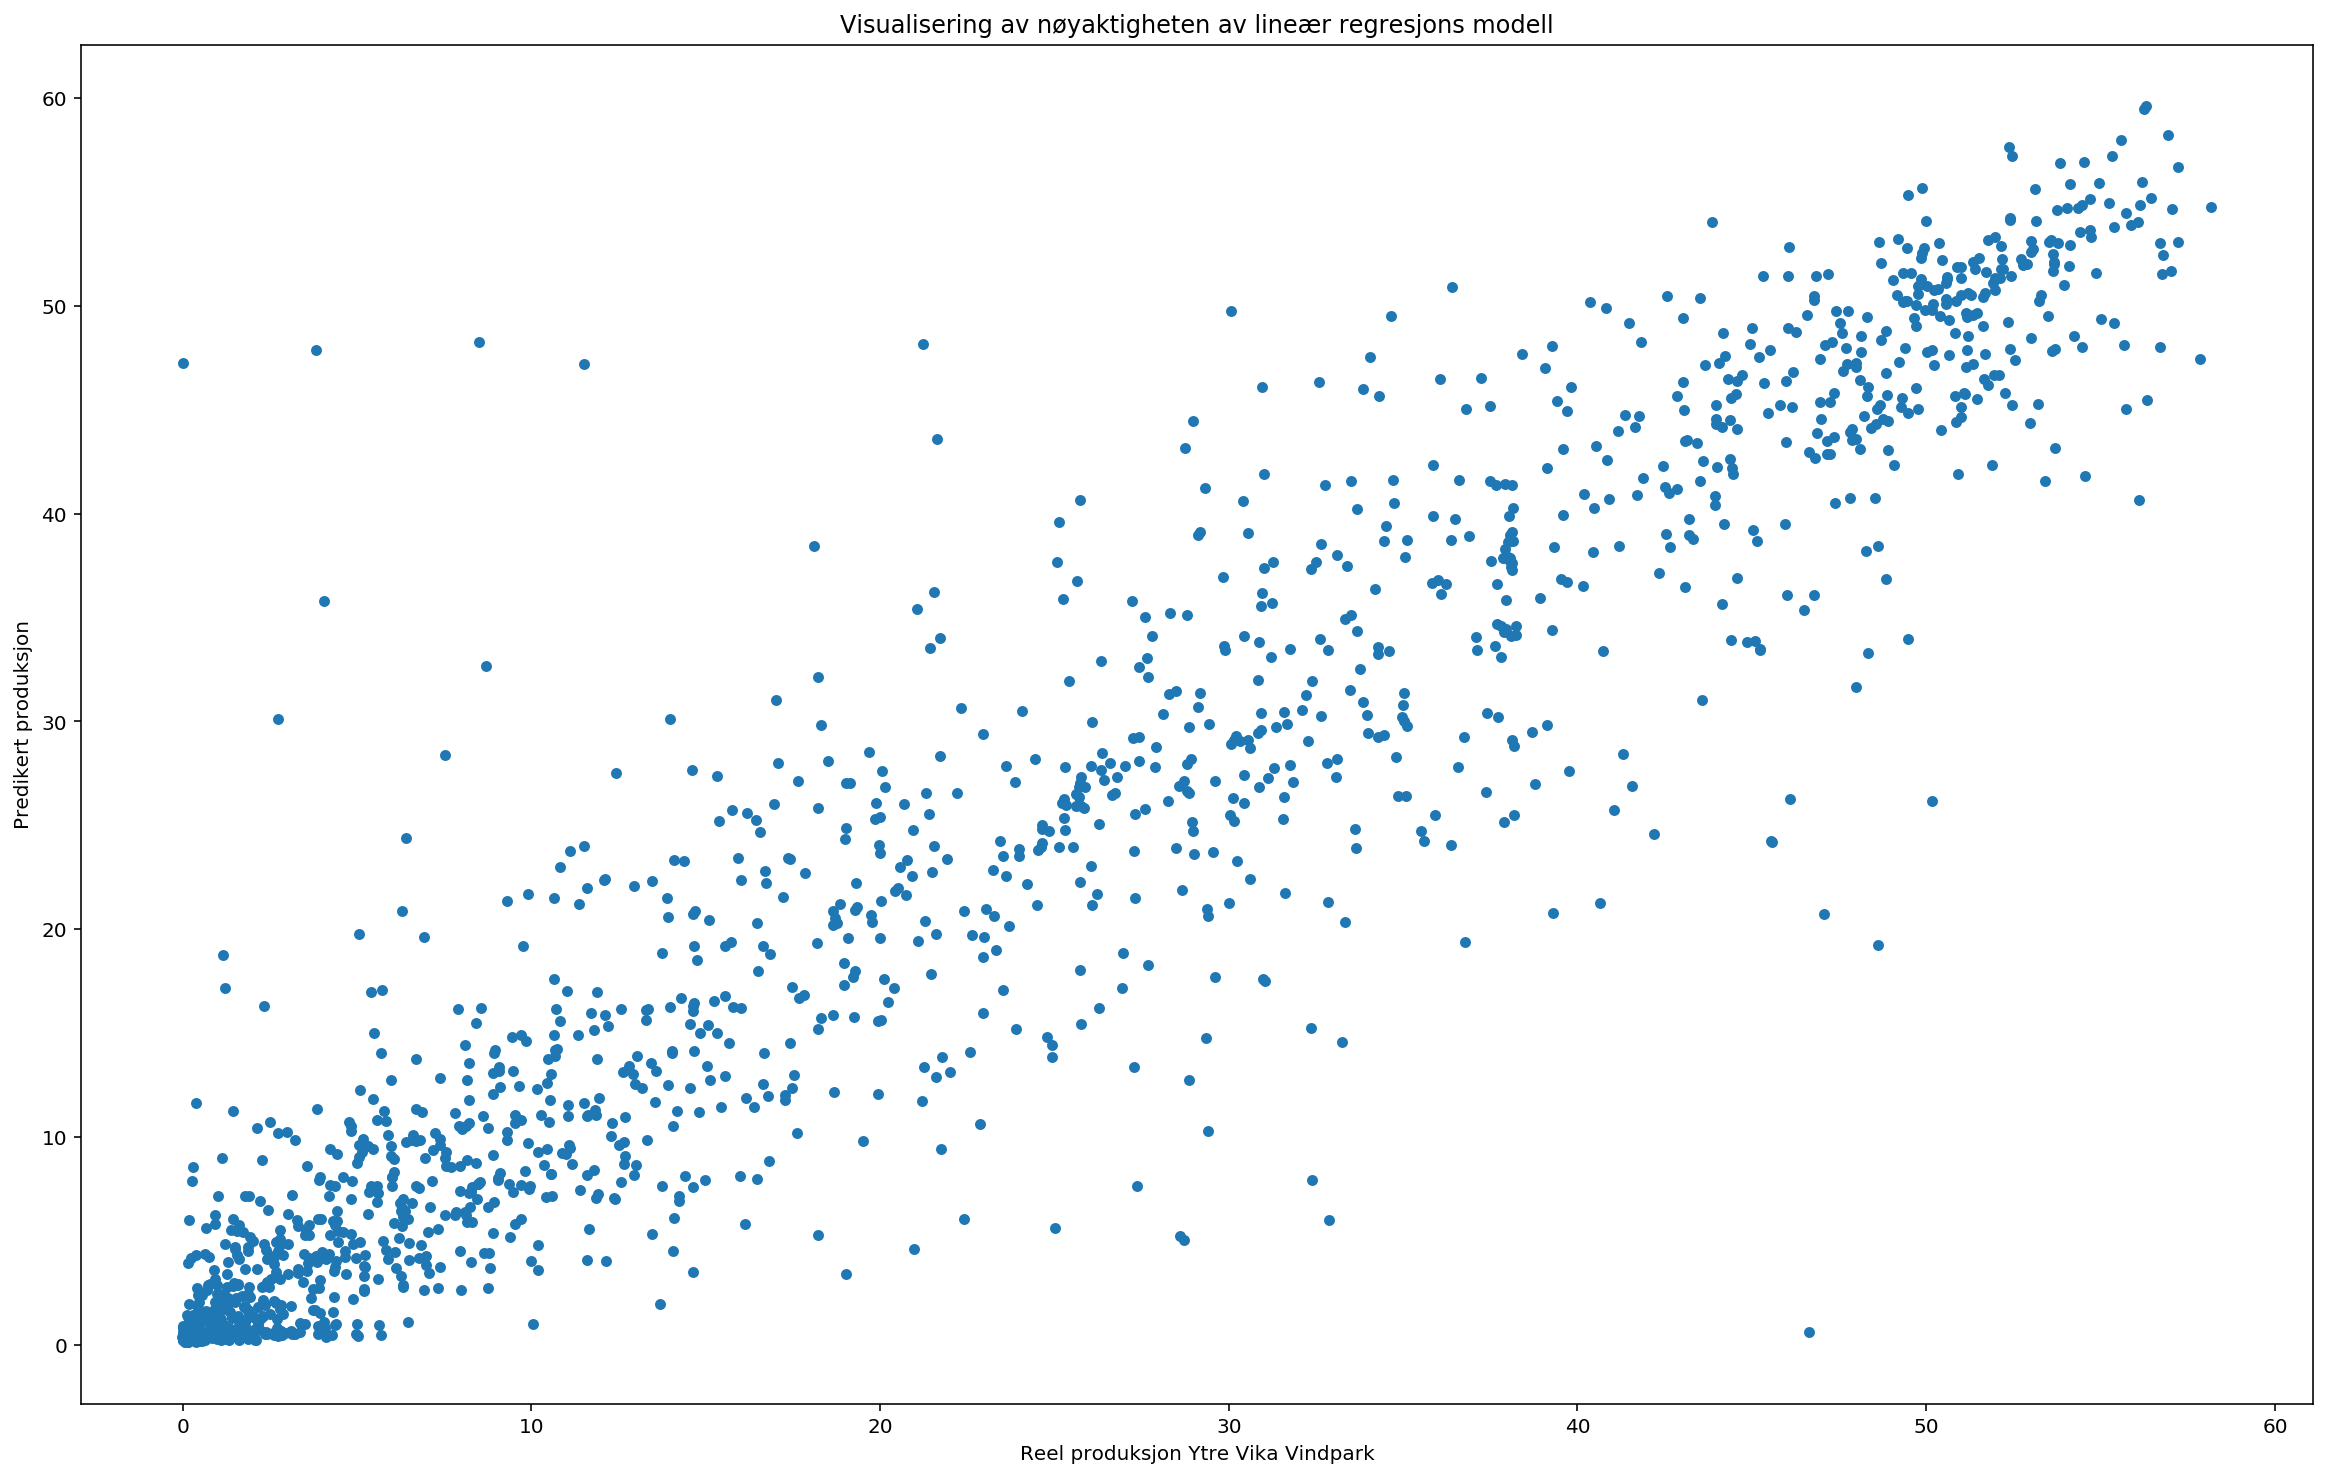

In [33]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

#### Treningsdata + Testdata

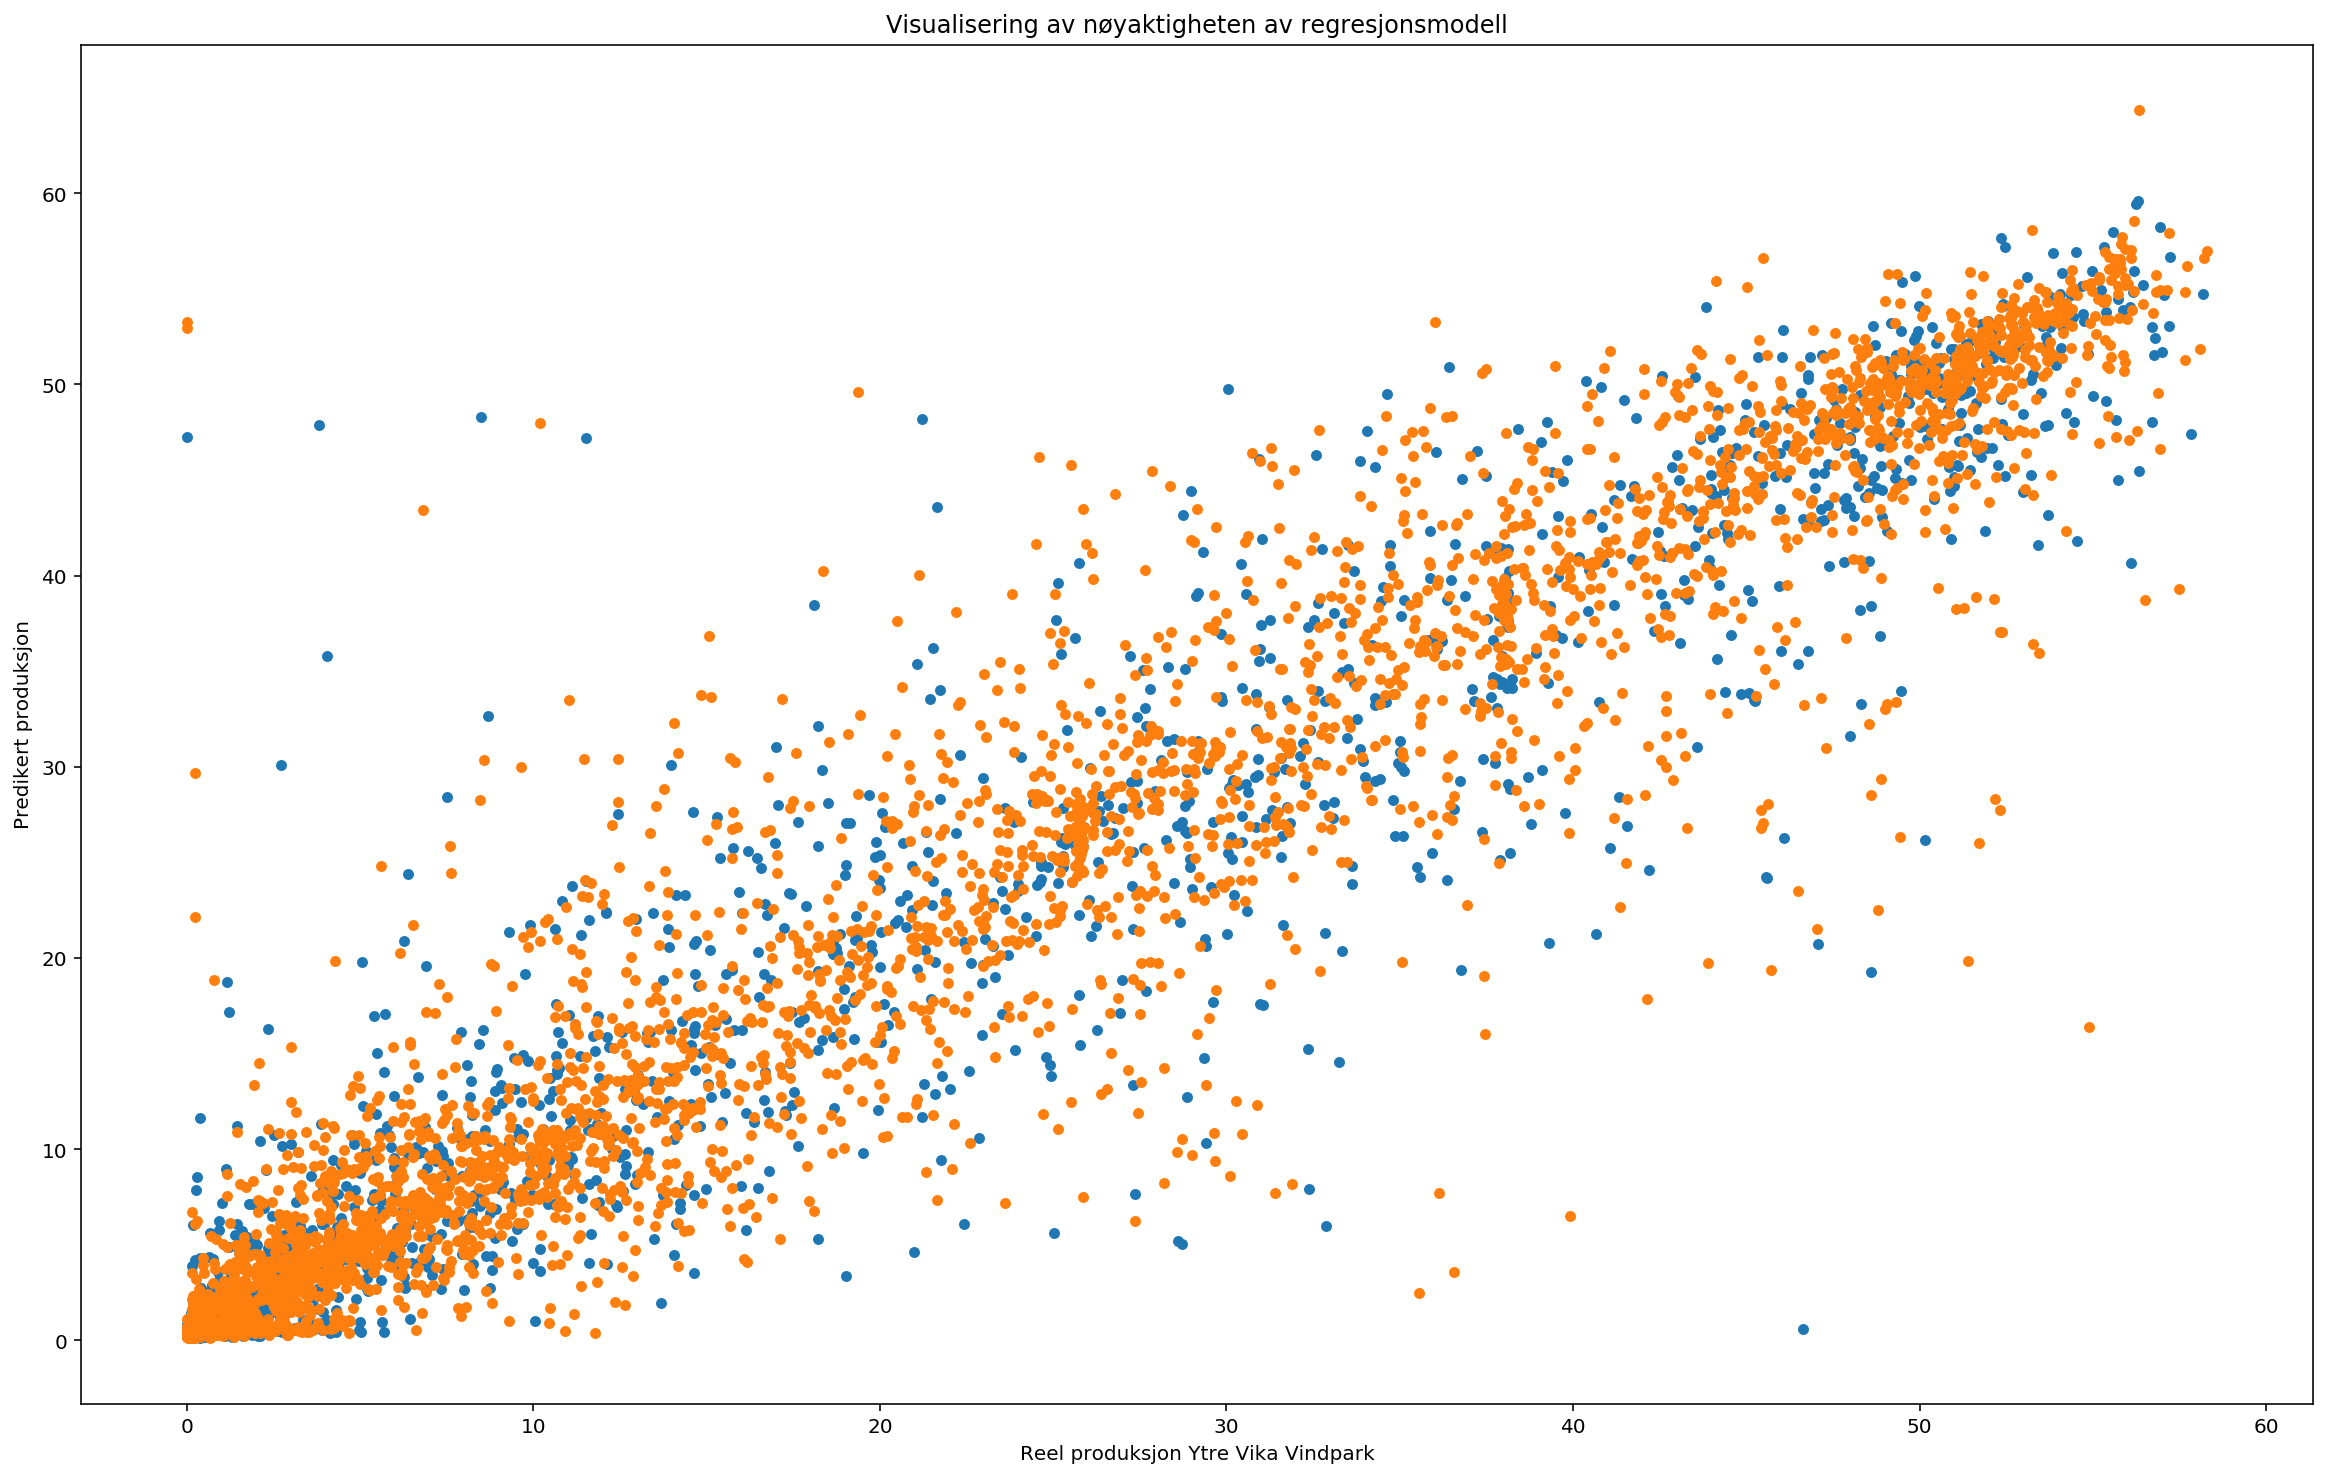

In [34]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)
plt.scatter(y_train,train_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av regresjonsmodell')

# Ytterligere undersøkelser av resultatene

#### Testdata

In [35]:
predictions = list(final_preds)


predictions_list = []
for pred in predictions:
    predictions_list.append(pred[0])

In [36]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

In [37]:
Oversikt.head(10)

,predicitions,real
0,15.606952,20.037815
1,23.620890,28.999432
2,8.927500,6.056117
3,34.392094,39.265781
4,47.668686,38.398964
5,1.797496,2.174283
6,51.561386,49.327663
7,36.647476,35.825981
8,9.711885,9.902432
9,29.409821,22.967316


In [38]:
Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions']  

In [39]:
Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

In [40]:
Oversikt.head()

,predicitions,real,differanse,abs_diff
0,15.606952,20.037815,4.430863,4.430863
1,23.620890,28.999432,5.378542,5.378542
2,8.927500,6.056117,-2.871383,2.871383
3,34.392094,39.265781,4.873688,4.873688
4,47.668686,38.398964,-9.269722,9.269722


In [41]:
#Oversikt['abs_diff'].hist(bins = 30)

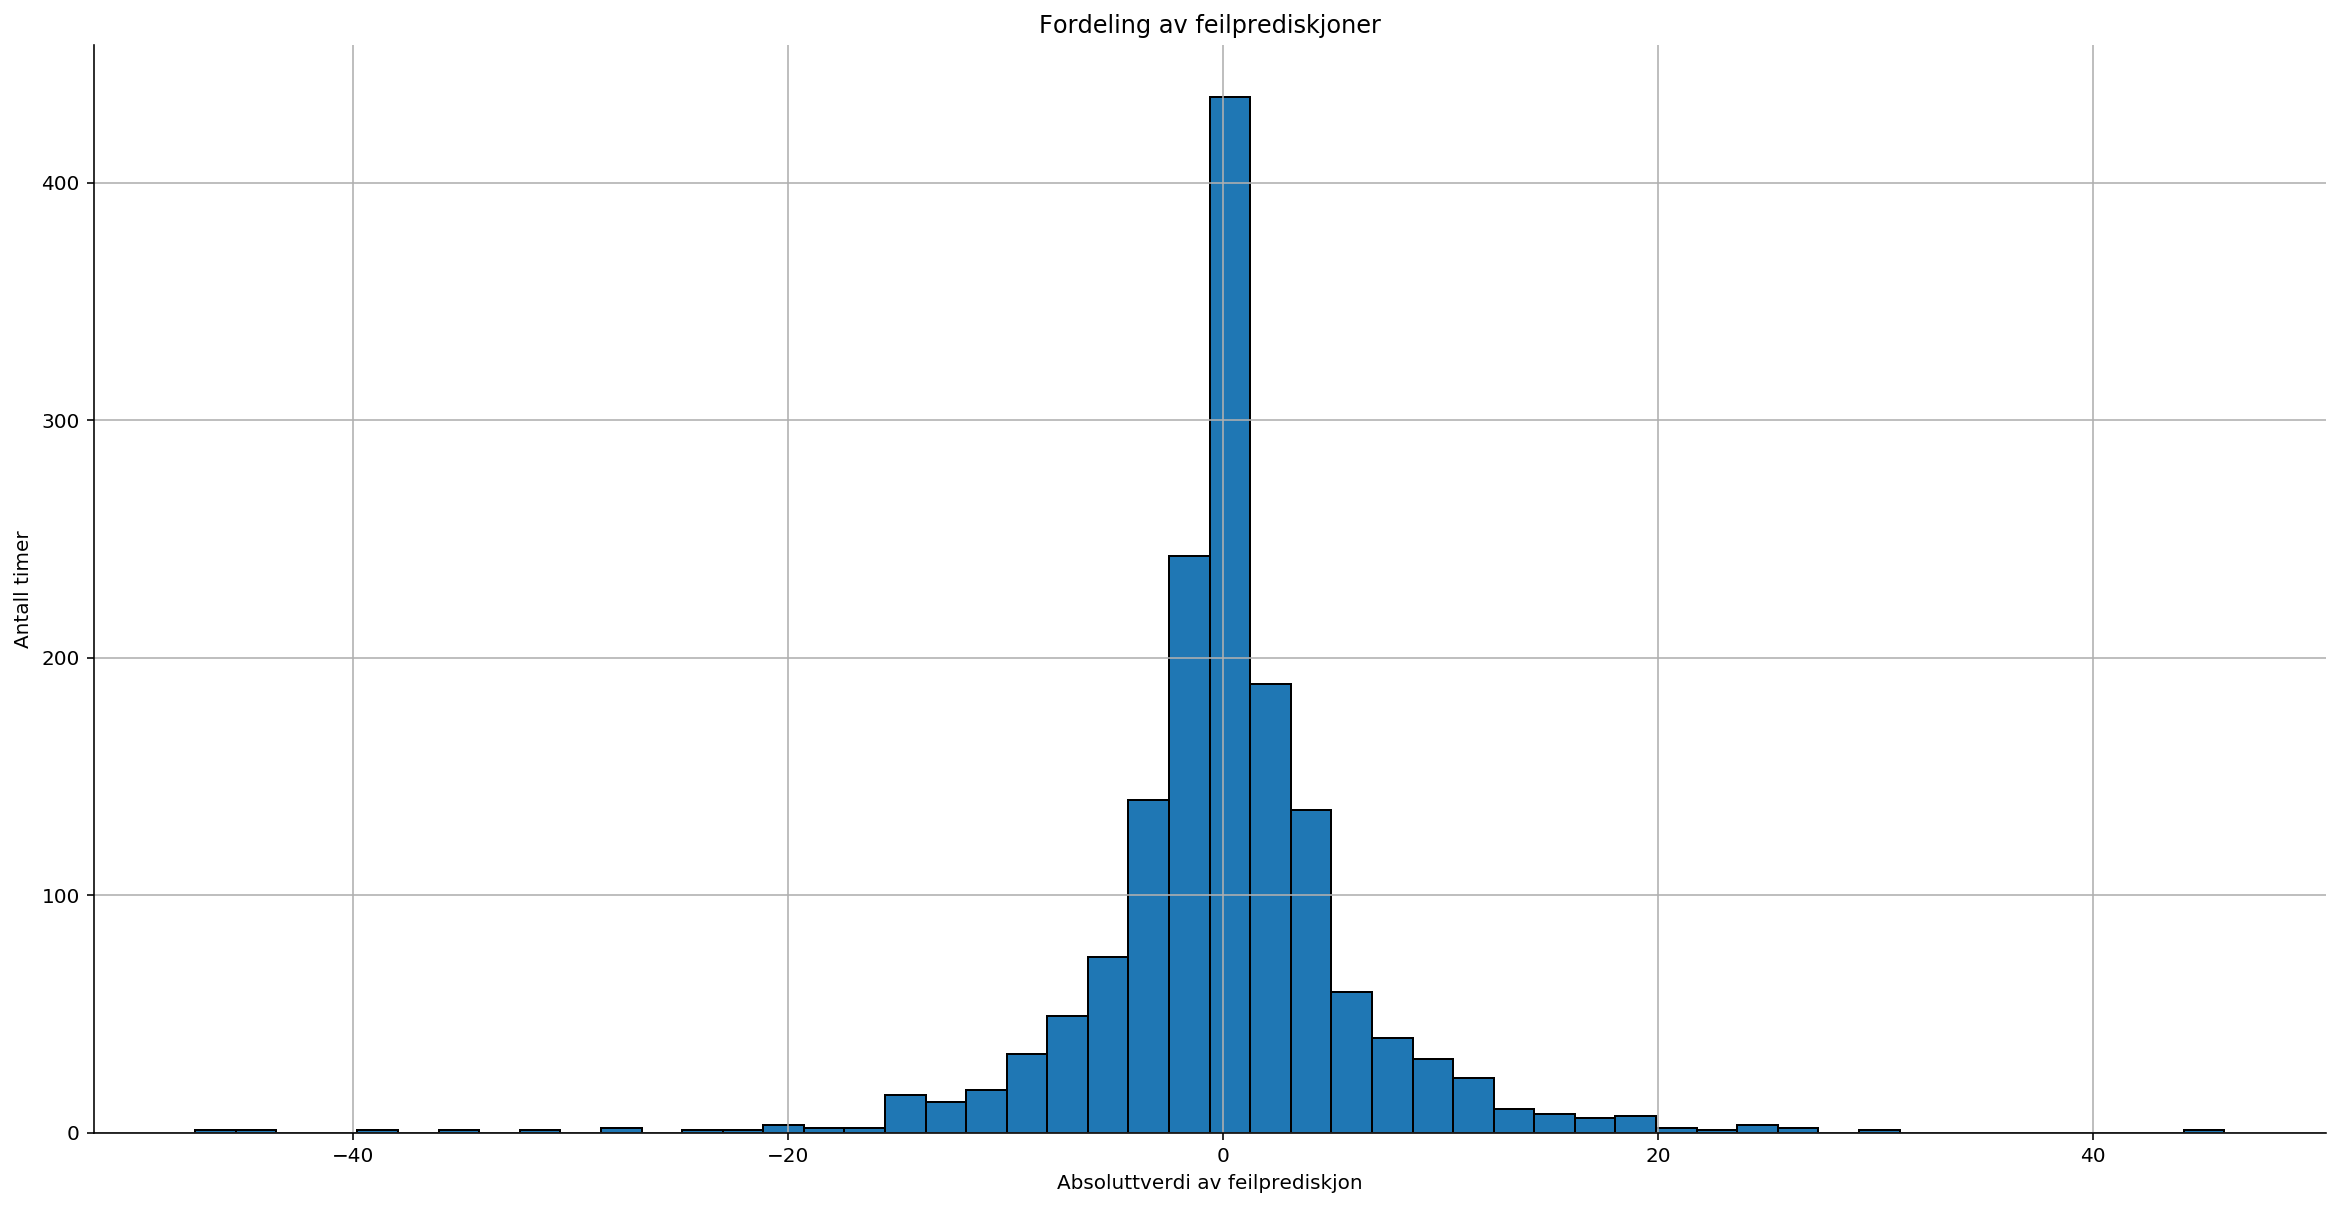

In [42]:
ax = Oversikt['differanse'].hist(bins=50,figsize = (20,10))

plt.xlabel('Absoluttverdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

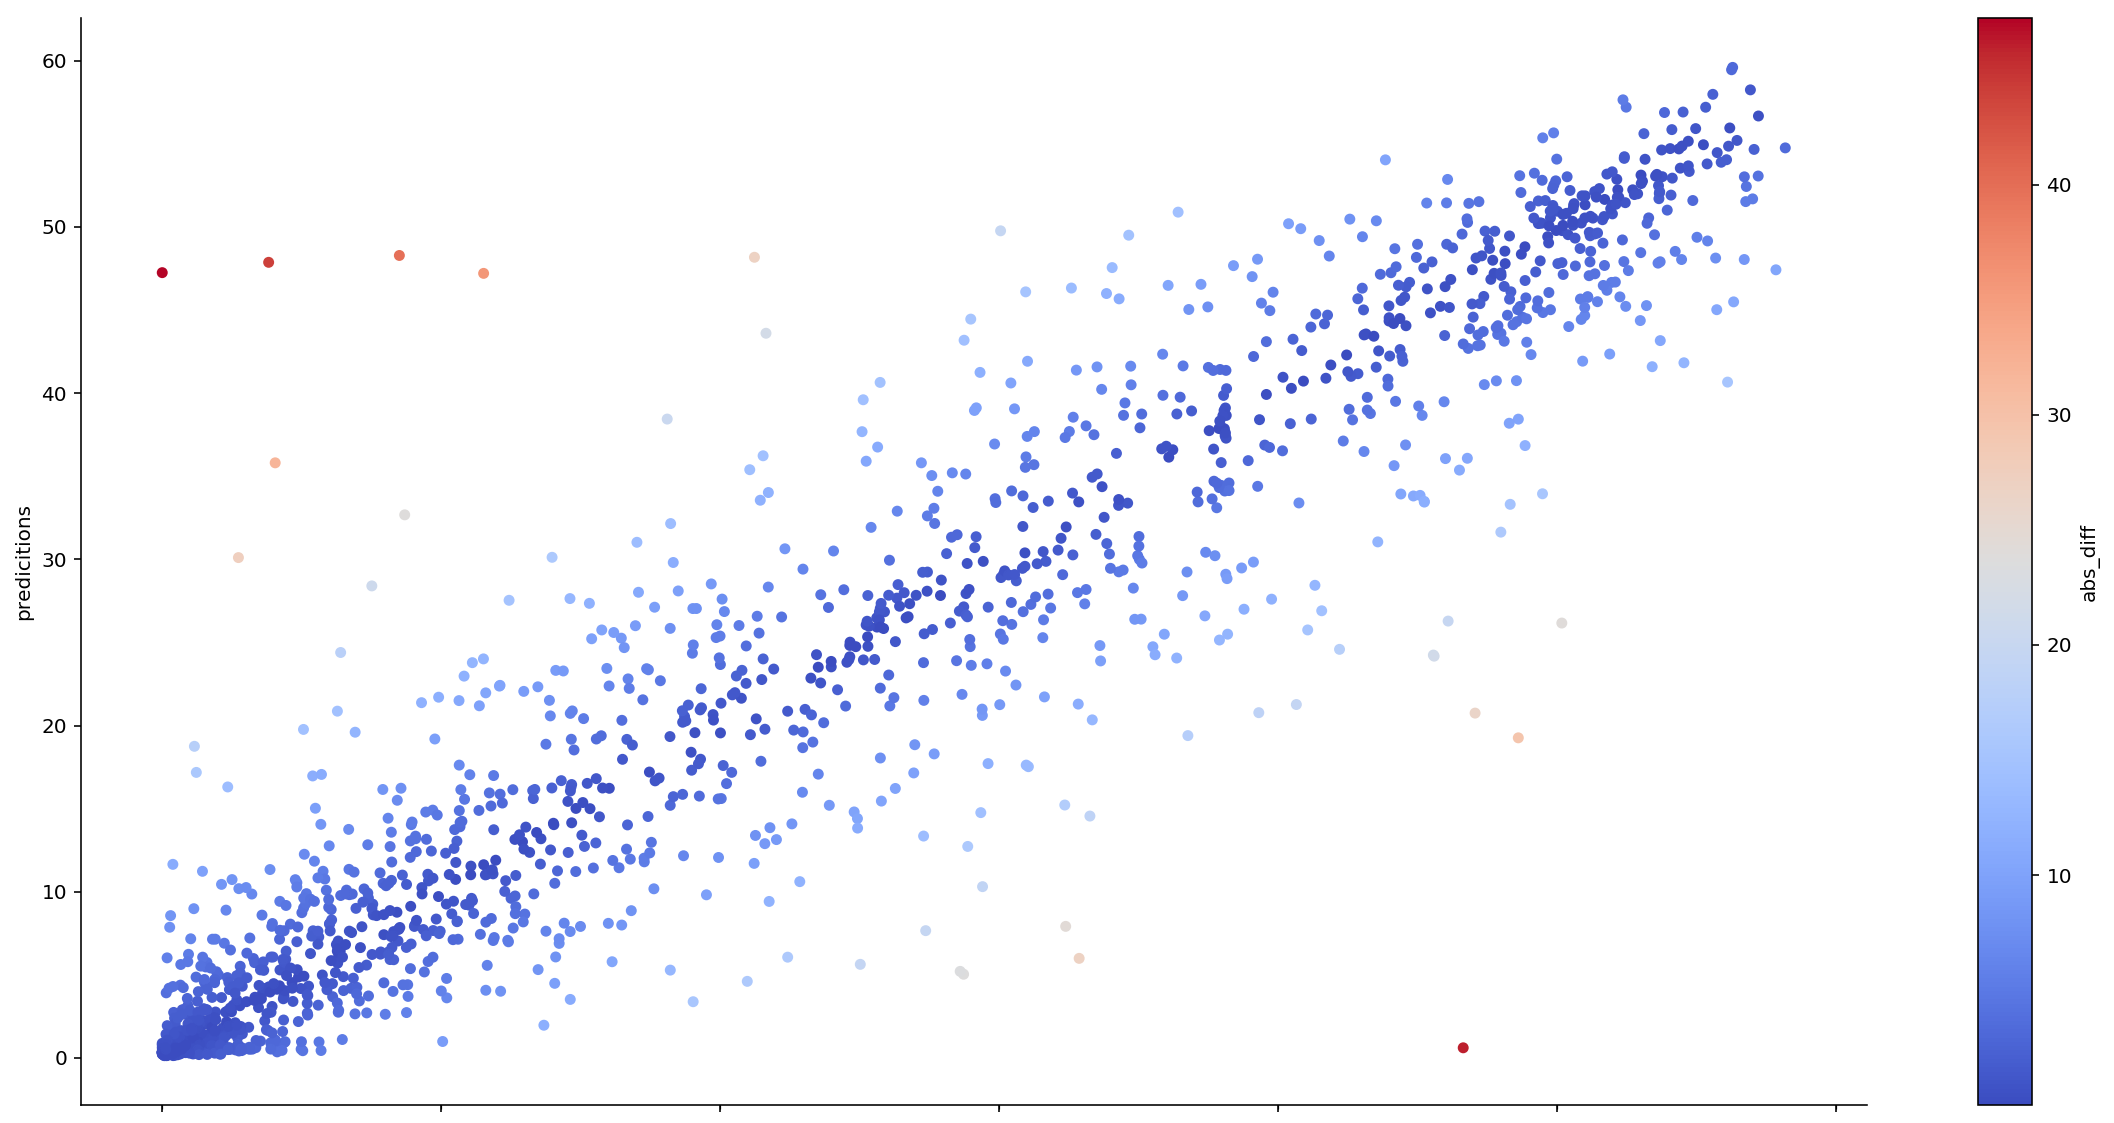

In [43]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

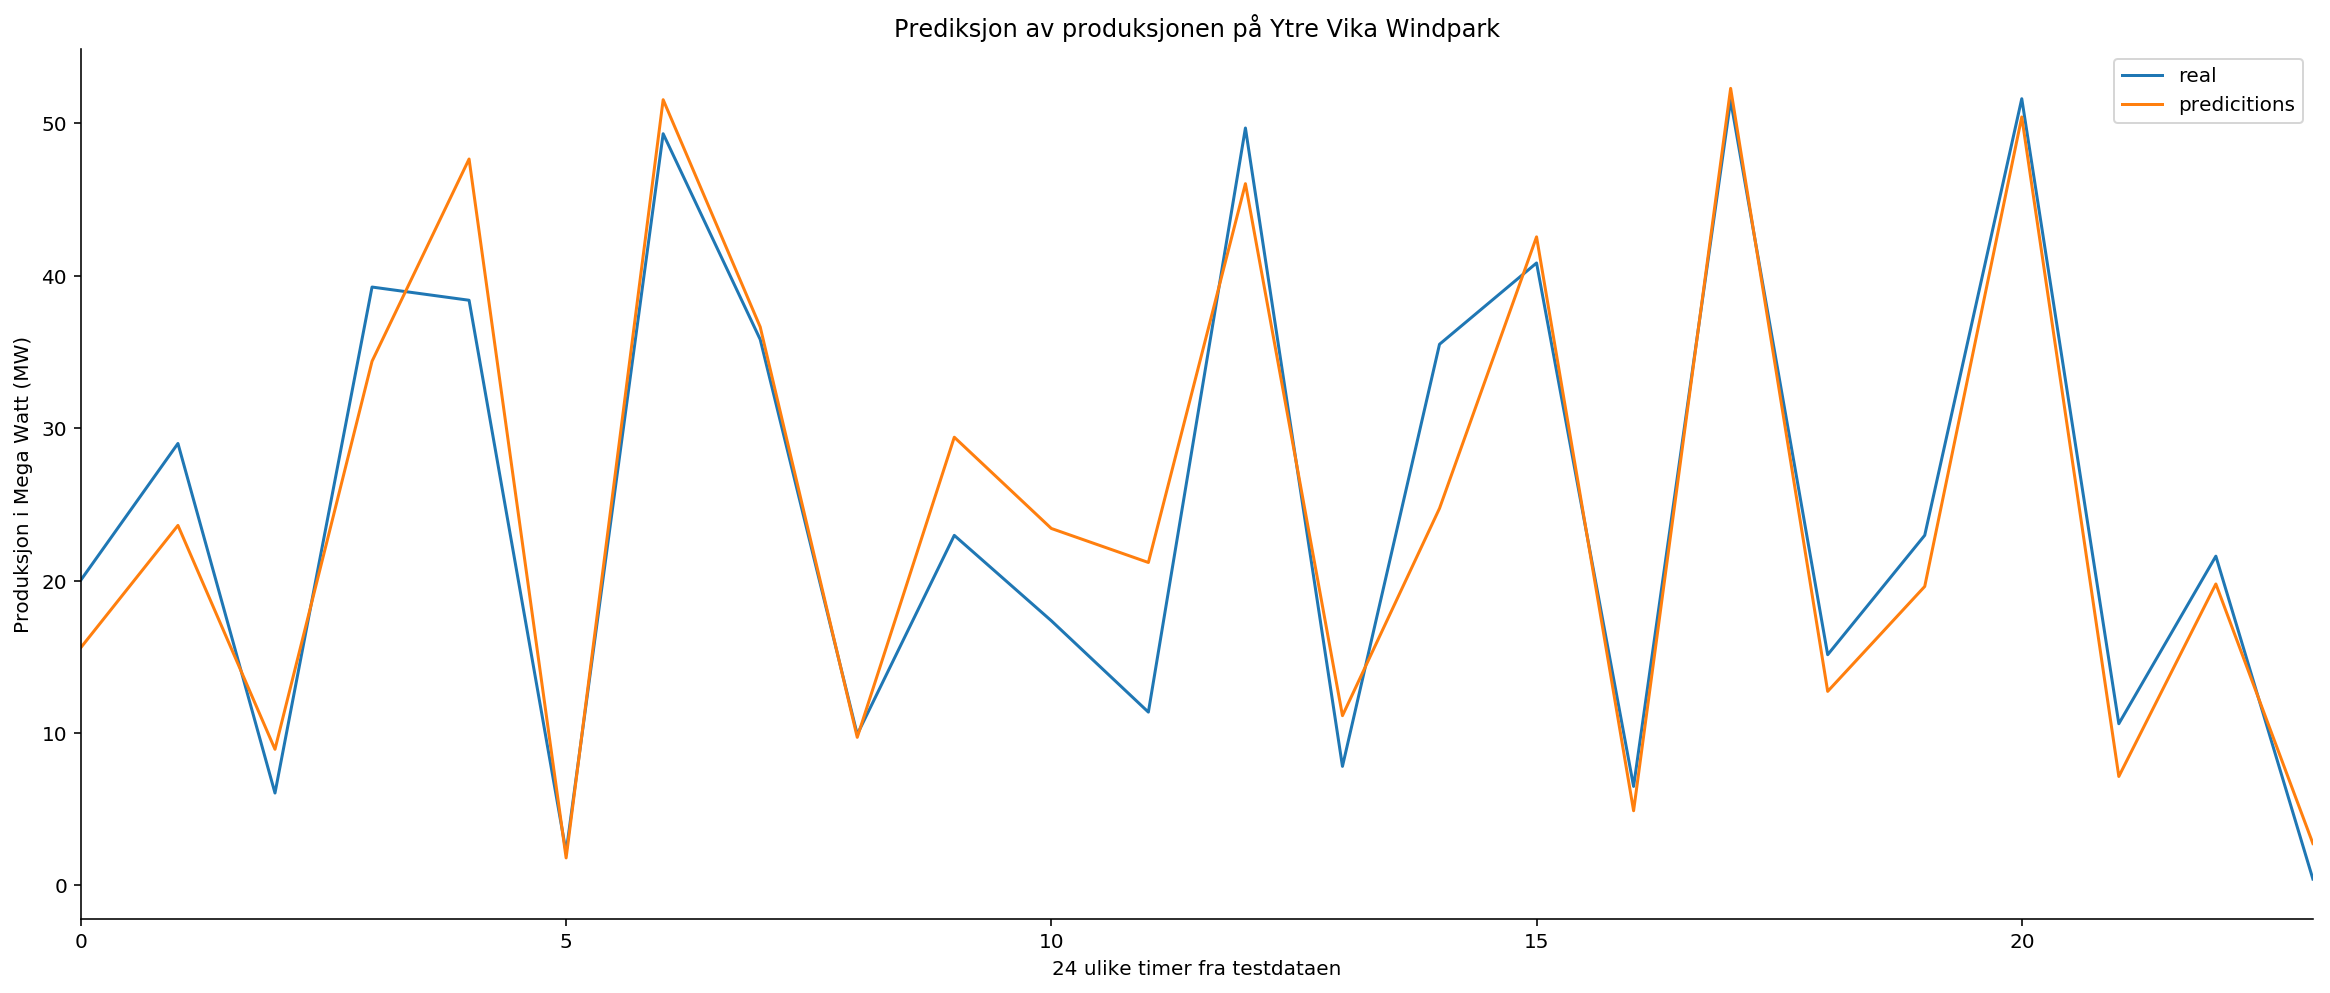

In [44]:
ax = Oversikt['real'].head(24).plot(figsize=(20,8))
ax = Oversikt['predicitions'].head(24).plot(figsize=(20,8))

plt.xlabel('24 ulike timer fra testdataen')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Prediksjon av produksjonen på Ytre Vika Windpark')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('24_punkter.png')

#### Inkludere treningsdata

In [45]:
predictions_train = list(train_preds)


predictions_train_list = []
for pred in predictions_train:
    predictions_train_list.append(pred[0])

In [46]:
Oversikt_trening = pd.DataFrame(data = {'real': y_train, 'predicitions': predictions_train_list})

In [47]:
Oversikt_trening['differanse'] = Oversikt_trening['real'] - Oversikt_trening['predicitions']  
Oversikt_trening['abs_diff'] = Oversikt_trening['differanse'].apply(abs)

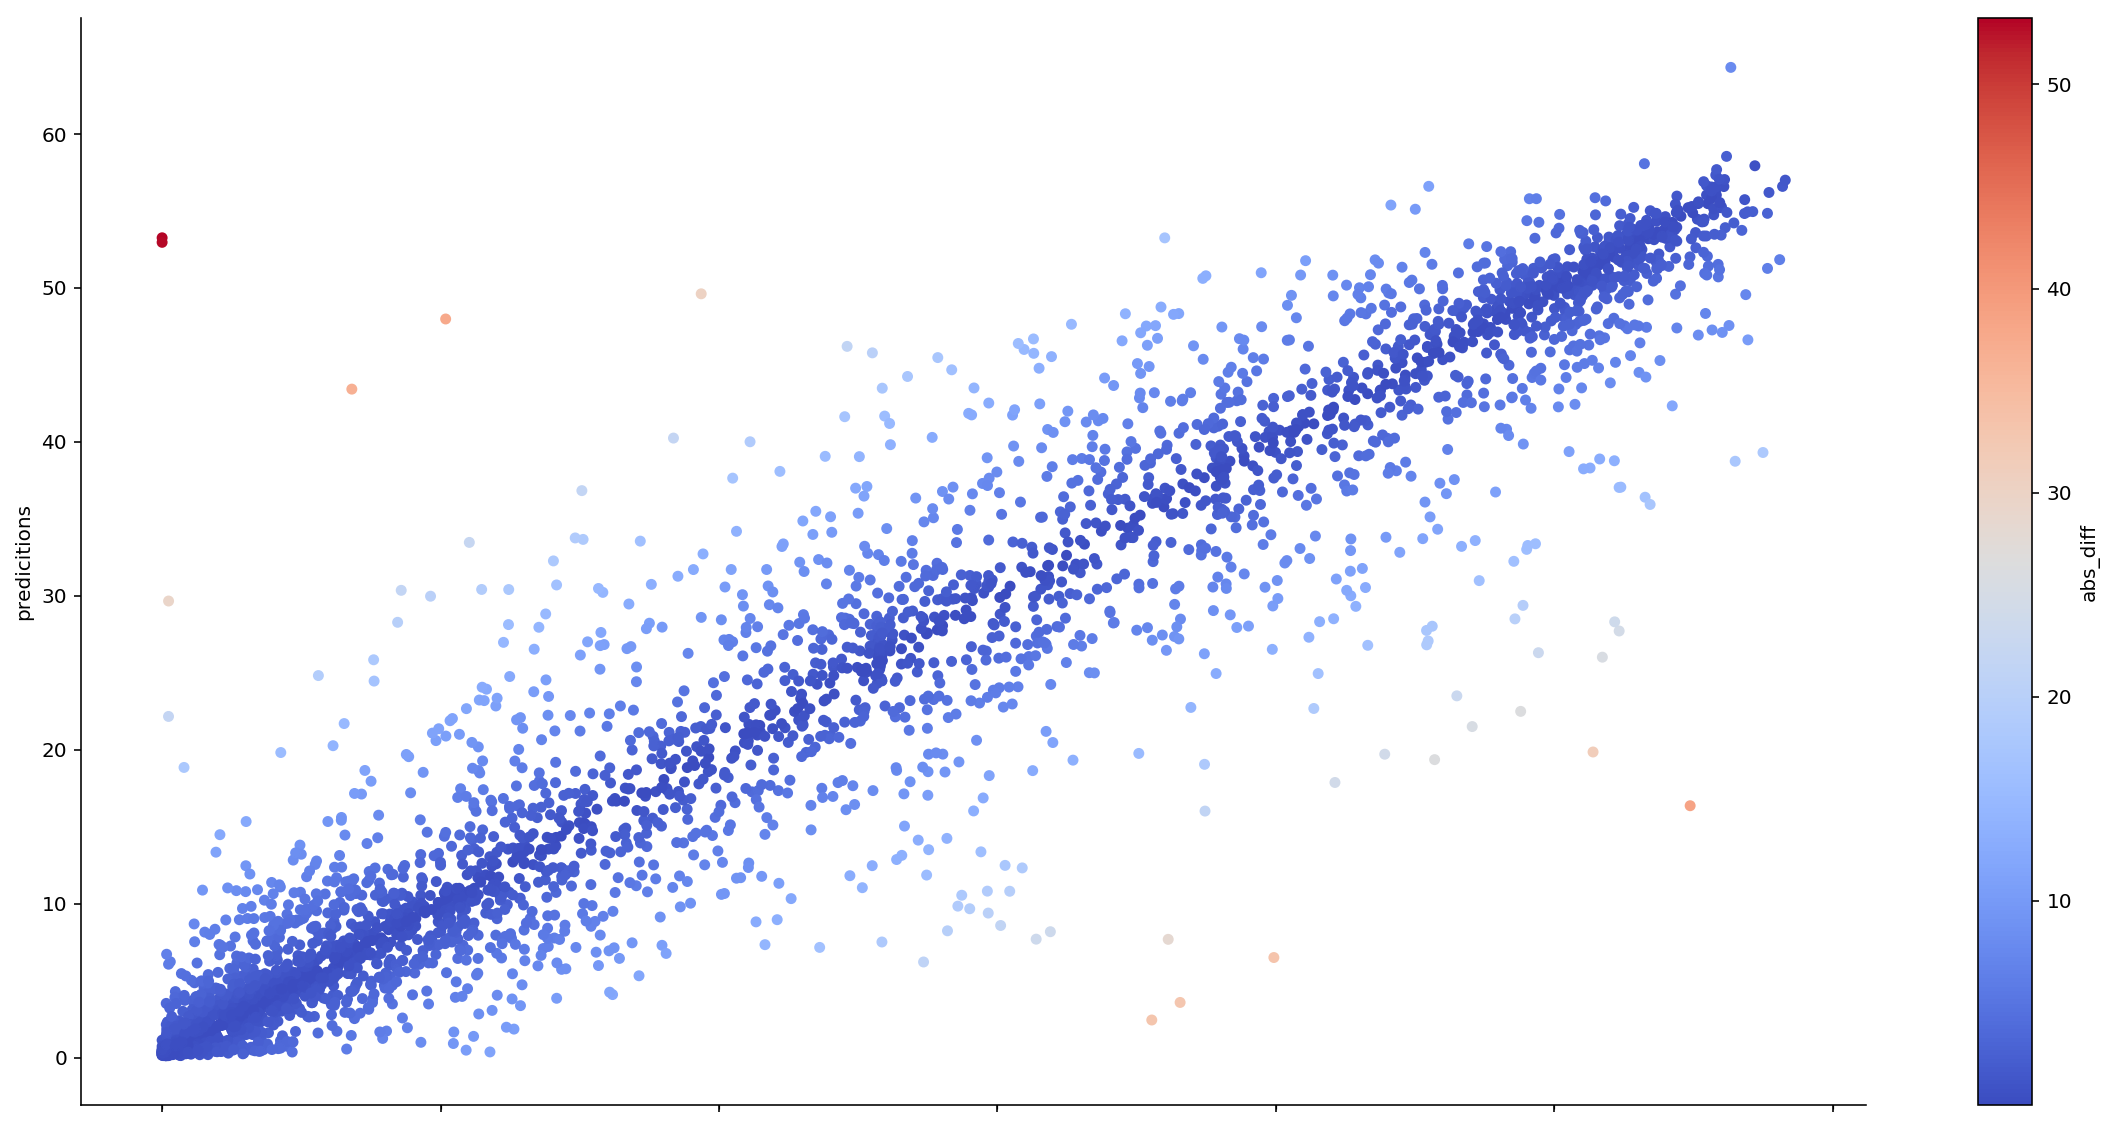

In [48]:
ax = Oversikt_trening.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

 #### Sammenstille og plotte data

In [49]:
Oversikt_komplett = pd.concat([Oversikt,Oversikt_trening])

In [50]:
Oversikt_komplett.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 3632
Data columns (total 4 columns):
predicitions    5190 non-null float64
real            5190 non-null float32
differanse      5190 non-null float64
abs_diff        5190 non-null float64
dtypes: float32(1), float64(3)
memory usage: 182.5 KB


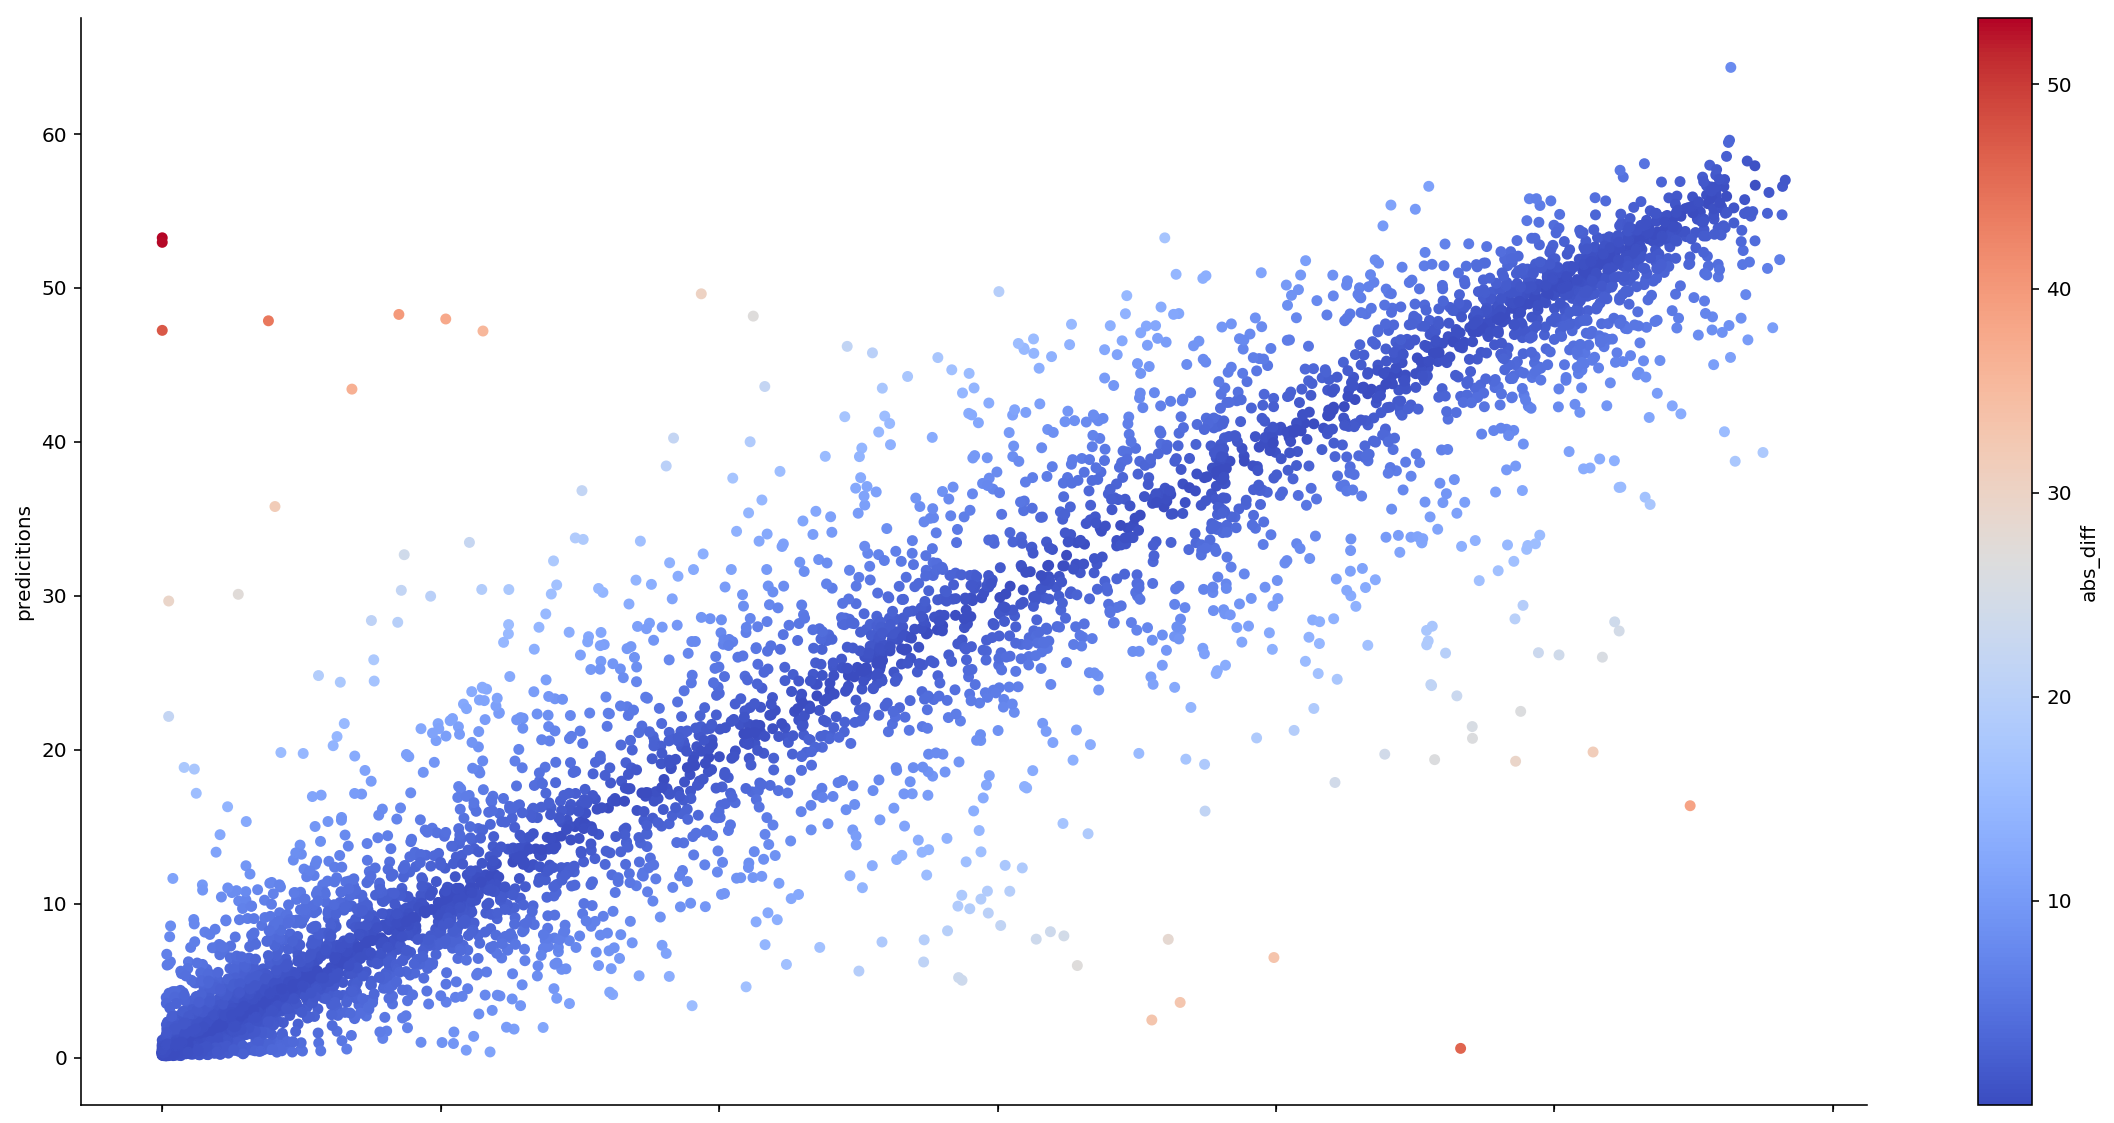

In [51]:
ax = Oversikt_komplett.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model_komplett.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut 1. september

In [52]:
sept = finished_model.predict(x[0:1000,:])

In [53]:
predictions_sept = list(sept)


predictions_sept_list = []
for pred in predictions_sept:
    predictions_sept_list.append(pred[0])

In [54]:
September = pd.DataFrame(data = {'real': y[0:1000], 'predicitions': predictions_sept_list})

In [55]:
September.head()

,predicitions,real
0,25.647589,24.097782
1,23.877066,29.852798
2,26.477455,29.481783
3,27.404522,30.434999
4,31.325447,27.689482


In [56]:
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

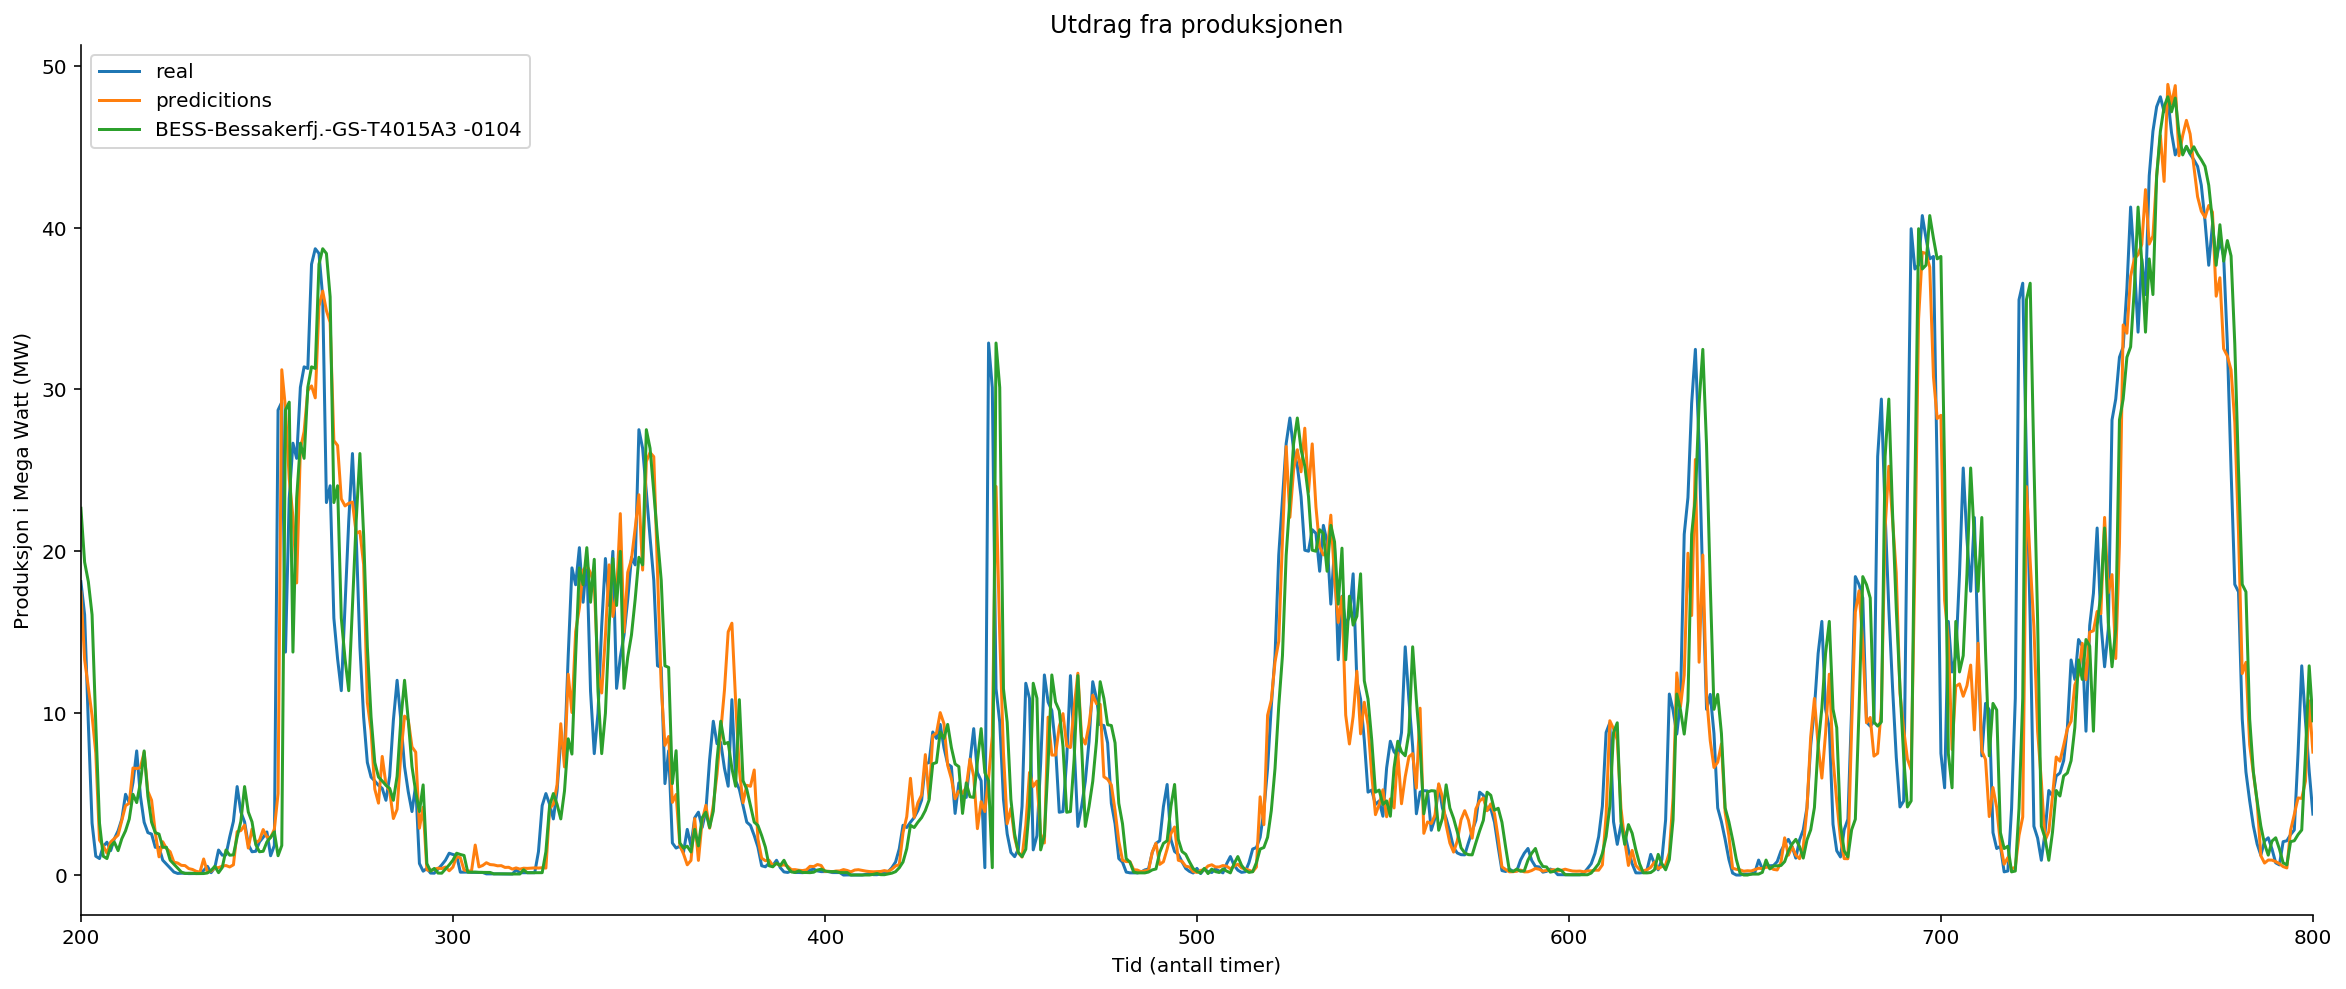

In [59]:
# Justere tidslinjen på plottet
start = 200
slutt = 800

ax = September.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = September.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'BESS-Bessakerfj.-GS-T4015A3 -0104'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')

In [ ]:
data_raw.head()

In [ ]:
len(X_test)